In [190]:
# Let's import the main libraries that I will use in this dataset.

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 9 columns of a dataframe
pd.set_option('display.max_columns', 9)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [191]:
# I will check the two CSV files to see what the difference between them.

graduate_first = pd.read_csv('../input/Admission_Predict.csv')
graduate_first.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [192]:
graduate_first.shape

(400, 9)

In [193]:
graduate_second = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
graduate_second.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [194]:
graduate_second.shape

(500, 9)

In [195]:
# I saw that maybe the second one is a recent version, so I will use this one.

graduate = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

In [196]:
# See the column data types and non-missing values.
graduate.info()

# Apparently we don't have any missing values;
# We don't have any 'object' column to convert to 'float' or 'int'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [197]:
# Statistics for each column

graduate.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [198]:
# with the pourpuse to be sure about no missing values in our dataset. I will code a function which will help us on it.

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [199]:
missing_values_table(graduate)

# Great! Now we now that for sure we don't have any missing values.

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [200]:
# Let's start now the Exploratory Data Analysis (EDA) to understand better our dataset and see the correlations among the variables.

# Fist I will see the name of the columns. The goal here is read the name of the columns and realize some strange names or even errors.
# Sometimes is a good practice to rename some of them to easy manipulate.

graduate.columns

# We can see below that some column names has a space in the end, is good to rename them droping these spaces.
# To manipule better the columns, I will chance the name of some of them as weel.

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [201]:
graduate.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)
graduate.columns

Index(['SerialNo', 'GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

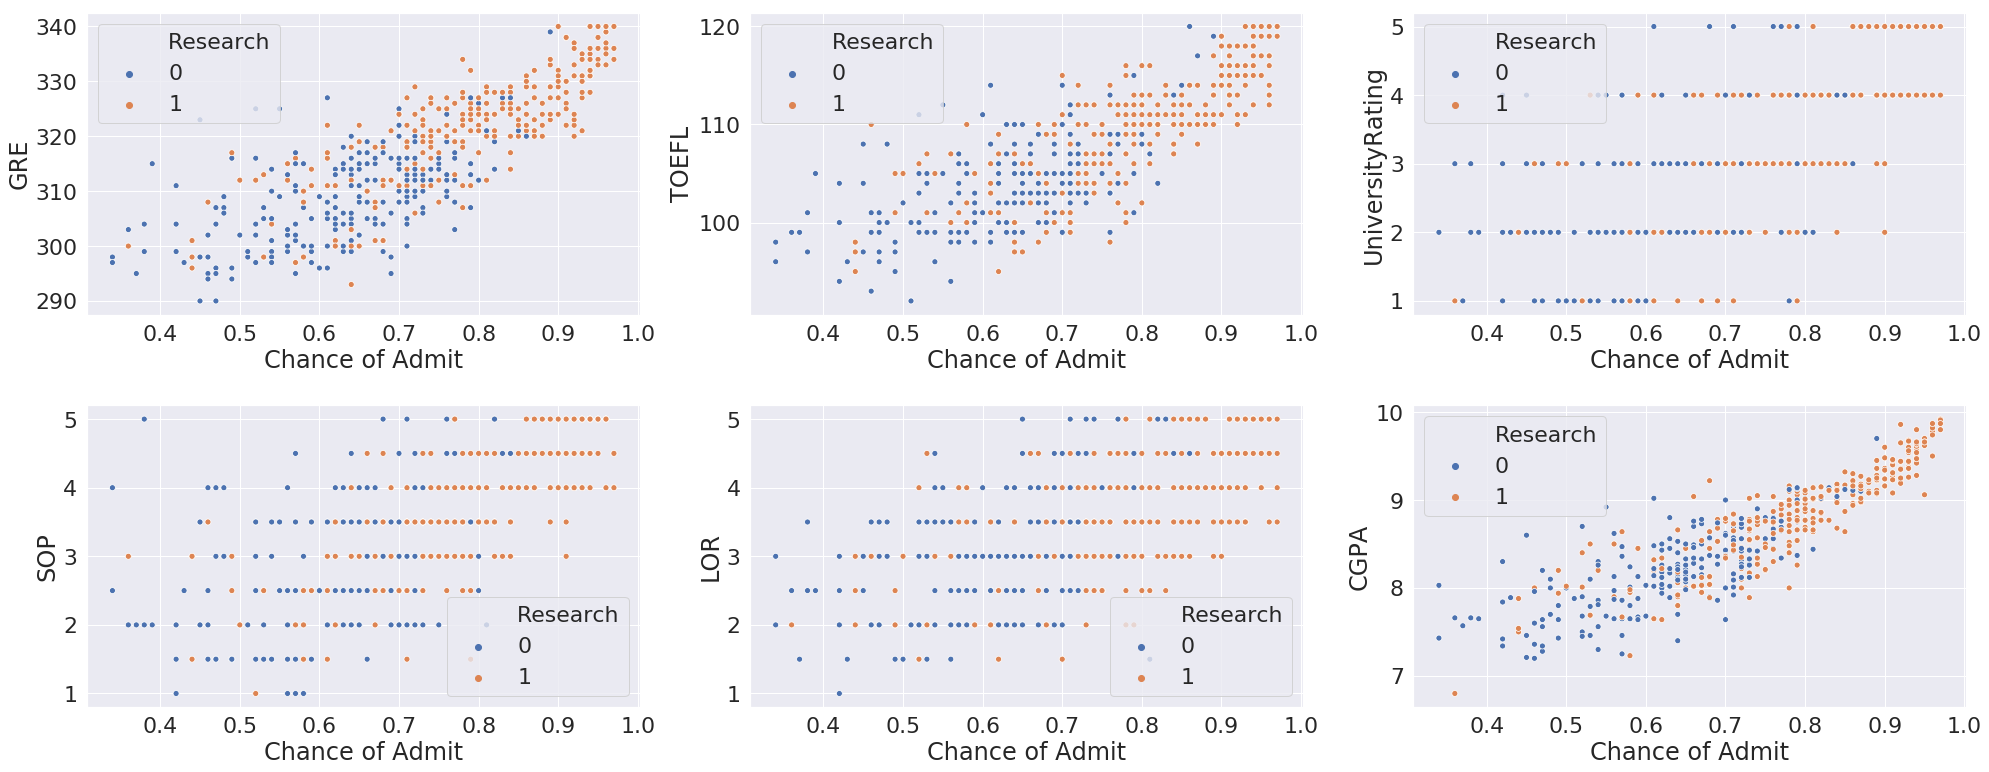

In [202]:
# First of all, I will see the correlation between any variable with the target.

# I will drop the 'SerialNo' and 'Research' columns because the serial number just identify the student and the Research has a boolean value and I will 
# use in the 'hue' parameter.

fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, 7):
    ax = fig.add_subplot(3, 3, i)
    sns.scatterplot(x=graduate['Chance'], y= graduate.iloc[:,i], hue=graduate.Research)
    plt.xlabel('Chance of Admit')
    plt.ylabel(graduate.columns[i])
    
# Conclusions:
#    - The better graph of the features 'UniversityRating', 'SOP', 'LOR' and 'Research' is not scatterplot;
#    - 'GRE', 'TOEFL' and 'CGPA' graphs have a linear behavior;
#    - The tendency which we can see is, as higher as the 'GRE', 'TOEFL' and 'CGPA' higher is the chance of admission;
#    - The other tendency that we can see is if the person has a research has more probability to be admitted.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


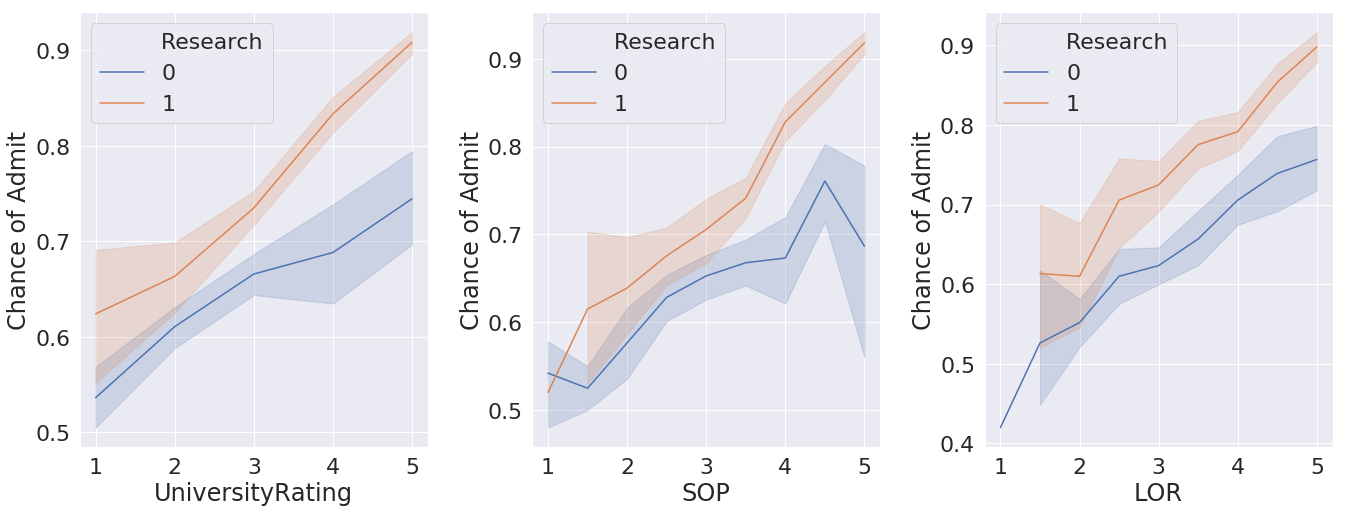

In [203]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
for i in range(1, 4):
    ax = fig.add_subplot(1, 3, i)
    sns.lineplot(x= graduate.iloc[:,i+2], y= graduate['Chance'], hue=graduate.Research)
    plt.xlabel(graduate.columns[i+2])
    plt.ylabel('Chance of Admit')
    
# Conclusion:
#    - Here we can see again a linear correlation between these variables and the target;
#    - The tendency which we can see is, as higher as the 'UniversityRating', 'SOP' and 'LOR' higher is the chance of admission;
#    - The other tendency that we can see is if the person has a research has more probability to be admitted.

In [204]:
# Now we will remove the outliers

# I will use a stats concept (formula) to figure out the outliers that maybe can there are in my dataset.

for i in graduate.columns:
    # Calculate first and third quartile
    first_quartile = graduate[i].describe()['25%']
    third_quartile = graduate[i].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    graduate = graduate[(graduate[i] > (first_quartile - 3 * iqr)) & (graduate[i] < (third_quartile + 3 * iqr))]

In [205]:
# Let's quantify the correlations between the features with the target and see what variables have more impact in the admisson.

# Find all correlations and sort 
correlations_data = graduate.drop(labels=['SerialNo'], axis=1).corr()['Chance'].sort_values(ascending=False)

# Print the correlations
print(correlations_data)

# Conclusions:
#    - We have basic three groups of influencers: high(CGPA, GRE and TOEFL), intermediary(University rating, SOP and LOR) and low(Research);
#    - All of them have a positive influence.

Chance              1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Chance, dtype: float64


In [206]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = graduate.drop(columns='Chance')
targets = pd.DataFrame(graduate['Chance'])

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(400, 8)
(100, 8)
(400, 1)
(100, 1)


In [207]:
# # # Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [208]:
# # # Establish a Baseline

# # Metric: Mean Absolute Error

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [209]:
# Now we can make the median guess and evaluate it on the test set.
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 0.04
Baseline Performance on the test set: MAE = 0.6705


In [210]:
# # # Evaluating and Comparing Machine Learning Models

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [211]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [212]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [213]:
# # # Models to Evaluate

# We will compare five different machine learning models:

# 1 - Linear Regression
# 2 - Support Vector Machine Regression
# 3 - Random Forest Regression
# 4 - Gradient Boosting Regression
# 5 - K-Nearest Neighbors Regression

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [214]:
# # Linear Regression

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.9255


In [215]:
# # SVM

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 1.0834


In [216]:
# # Random Forest

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.9845


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [217]:
# # Gradiente Boosting Regression

gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 1.0013


In [218]:
# # KNN

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.8978


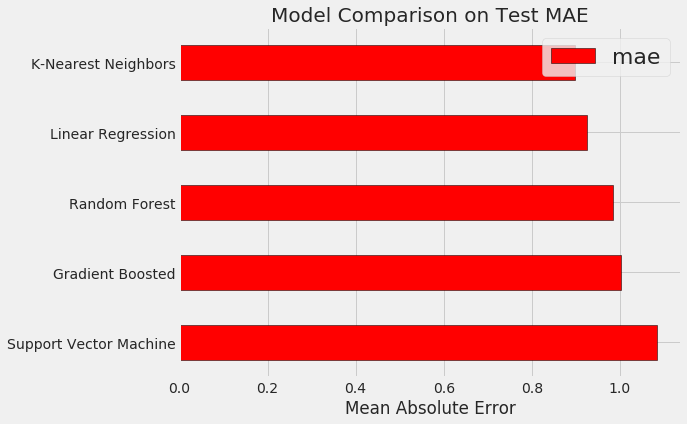

In [219]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);